<a href="https://colab.research.google.com/github/Mokhelelitsholo/Mokhelelitsholo/blob/main/German_Model_With_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the librarys
import pandas  as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing the data
data = pd.read_csv("German.csv")

In [ ]:
#Searching for Missings,type of data and also known the shape of data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [ ]:
#Looking unique values
print(data.nunique())

#Looking the data
print(data.head())



Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  fur

In [ ]:
#Creating an categorical variable to handle with the Age variable
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
data["Age_cat"] = pd.cut(data.Age, interval, labels=cats)


df_good = data[data["Risk"] == 'good']
df_bad = data[data["Risk"] == 'bad']


In [ ]:
#Transforming the data into Dummy variables

data['Saving accounts'] = data['Saving accounts'].fillna('no_inf')
data['Checking account'] = data['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
data = data.merge(pd.get_dummies(data.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
data = data.merge(pd.get_dummies(data.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
data = data.merge(pd.get_dummies(data.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
data = data.merge(pd.get_dummies(data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
data = data.merge(pd.get_dummies(data.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
data = data.merge(pd.get_dummies(data["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
data = data.merge(pd.get_dummies(data["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)



In [ ]:
#Deleting the old features 

del data["Saving accounts"]
del data["Checking account"]
del data["Purpose"]
del data["Sex"]
del data["Housing"]
del data["Age_cat"]
del data["Risk"]
del data['Risk_good']


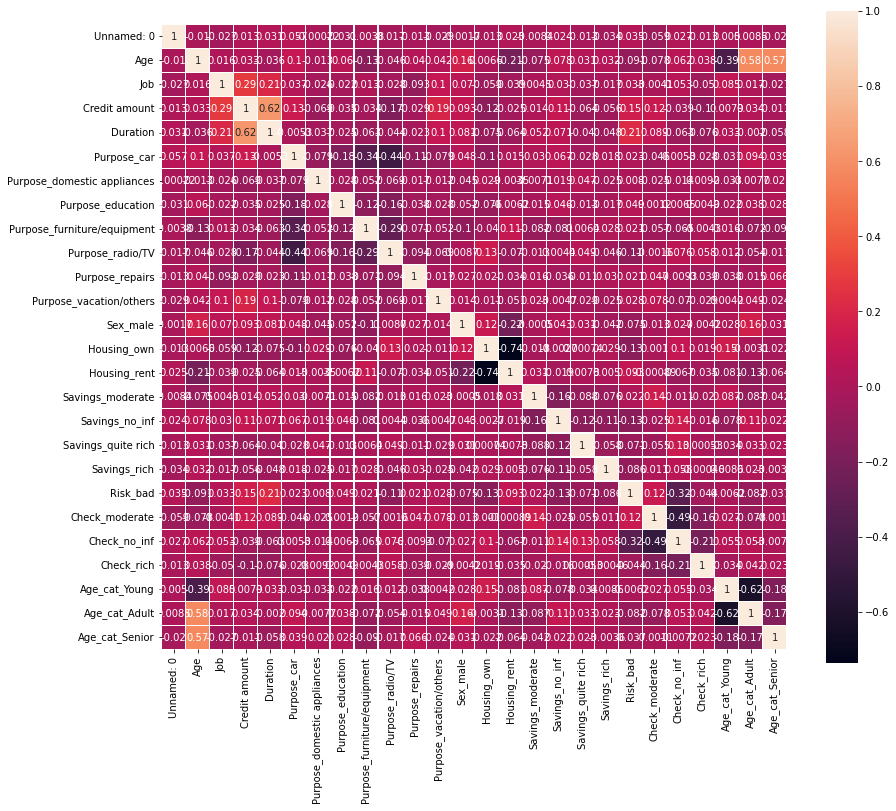

In [ ]:
#Looking the correlation of the data

plt.figure(figsize=(14,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [ ]:
#Preprocessing

from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.svm import SVC                             # SVM
from sklearn.tree import DecisionTreeClassifier         # Decision Tree
from sklearn.neural_network import MLPClassifier        # NN   
from xgboost import XGBClassifier                       # XGBoost
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier      # KNN

In [ ]:
data['Credit amount'] = np.log(data['Credit amount'])

In [ ]:
#Creating the X and y variables
X = data.drop('Risk_bad', 1).values
y = data["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
data.drop('Risk_bad', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,0,67,2,7.063904,6,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,22,2,8.691315,48,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2,49,1,7.647786,12,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3,45,2,8.972337,42,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,53,2,8.490849,24,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,7.459339,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
996,996,40,3,8.257645,30,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
997,997,38,2,6.689599,12,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
998,998,23,2,7.520235,45,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


SVM: 0.017418 (0.021728)
CART: 0.443759 (0.126617)
NN: 0.258280 (0.149324)
XGB: 0.392524 (0.089070)
NB: 0.606544 (0.075994)
KNN: 0.243788 (0.091046)


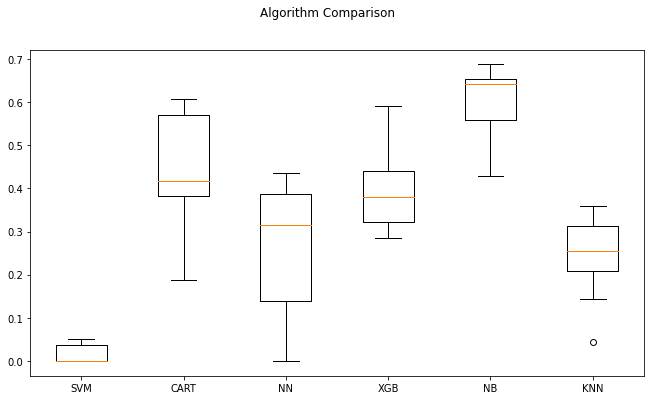

In [ ]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NN', MLPClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [ ]:
#Using Naive Bayes to predict the credit score

GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [ ]:
# Printing the Training Score

print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.704


In [ ]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.644


[[124  54]
 [ 35  37]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       178
           1       0.41      0.51      0.45        72

    accuracy                           0.64       250
   macro avg       0.59      0.61      0.59       250
weighted avg       0.67      0.64      0.65       250



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA  #Principal component analysis
from sklearn.feature_selection import SelectKBest

In [ ]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6973333333333334


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.708


[[148  30]
 [ 43  29]]


0.4178674351585015


In [ ]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

#GridSearch is a tool that is used for hyperparameter tuning

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=2),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'max_depth': 5,
 'min_child_weight': 3,
 'subsample': 0.75}

0.74


[[154  24]
 [ 41  31]]
ROC_AUC score: 0.7691947565543072


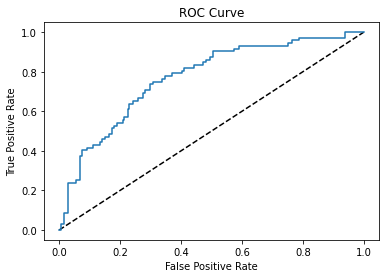

In [ ]:
# Our classifier

y_pred = grid_search.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_auc_score
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

print(f"ROC_AUC score: {roc_auc_score(y_test, y_pred_prob)}")

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 228
Before OverSampling, counts of label '0': 522 

After OverSampling, the shape of train_X: (1044, 25)
After OverSampling, the shape of train_y: (1044,) 

After OverSampling, counts of label '1': 522
After OverSampling, counts of label '0': 522


In [ ]:
#Using Naive Bayes to predict the credit score

GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train_res, y_train_res.ravel())
predictions = GNB.predict(X_test)


# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68       178
           1       0.40      0.71      0.51        72

    accuracy                           0.61       250
   macro avg       0.62      0.64      0.60       250
weighted avg       0.71      0.61      0.63       250

